In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
print('../input/covid19-data-from-john-hopkins-university')

../input/covid19-data-from-john-hopkins-university


In [12]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [14]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [15]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [33]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# train.csv has 554655 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/covid19-data-from-john-hopkins-university/RAW_us_confirmed_cases.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'RAW_us_confirmed_cases.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 304 columns


In [35]:
df1.head(10)

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,2159,2173,2186,2197,2212,2230,2242,2267,2283,2304
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,6940,6966,6985,6995,7061,7097,7134,7188,7226,7263
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,1060,1061,1065,1074,1079,1080,1090,1092,1095,1098
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,873,878,883,890,897,907,917,924,926,932
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,2074,2095,2108,2162,2188,2222,2253,2286,2297,2335
5,Alabama,Bullock,84001011,US,USA,840,1011.0,US,32.100305,-85.712655,...,653,655,655,657,659,661,662,663,664,664
6,Alabama,Butler,84001013,US,USA,840,1013.0,US,31.753001,-86.680575,...,1022,1024,1026,1029,1034,1037,1044,1046,1052,1054
7,Alabama,Calhoun,84001015,US,USA,840,1015.0,US,33.774837,-85.826304,...,4861,4892,4925,4951,5001,5039,5077,5153,5181,5217
8,Alabama,Chambers,84001017,US,USA,840,1017.0,US,32.913601,-85.390727,...,1389,1392,1397,1428,1449,1461,1469,1483,1485,1489
9,Alabama,Cherokee,84001019,US,USA,840,1019.0,US,34.178060,-85.606390,...,783,787,791,808,823,831,832,836,840,845


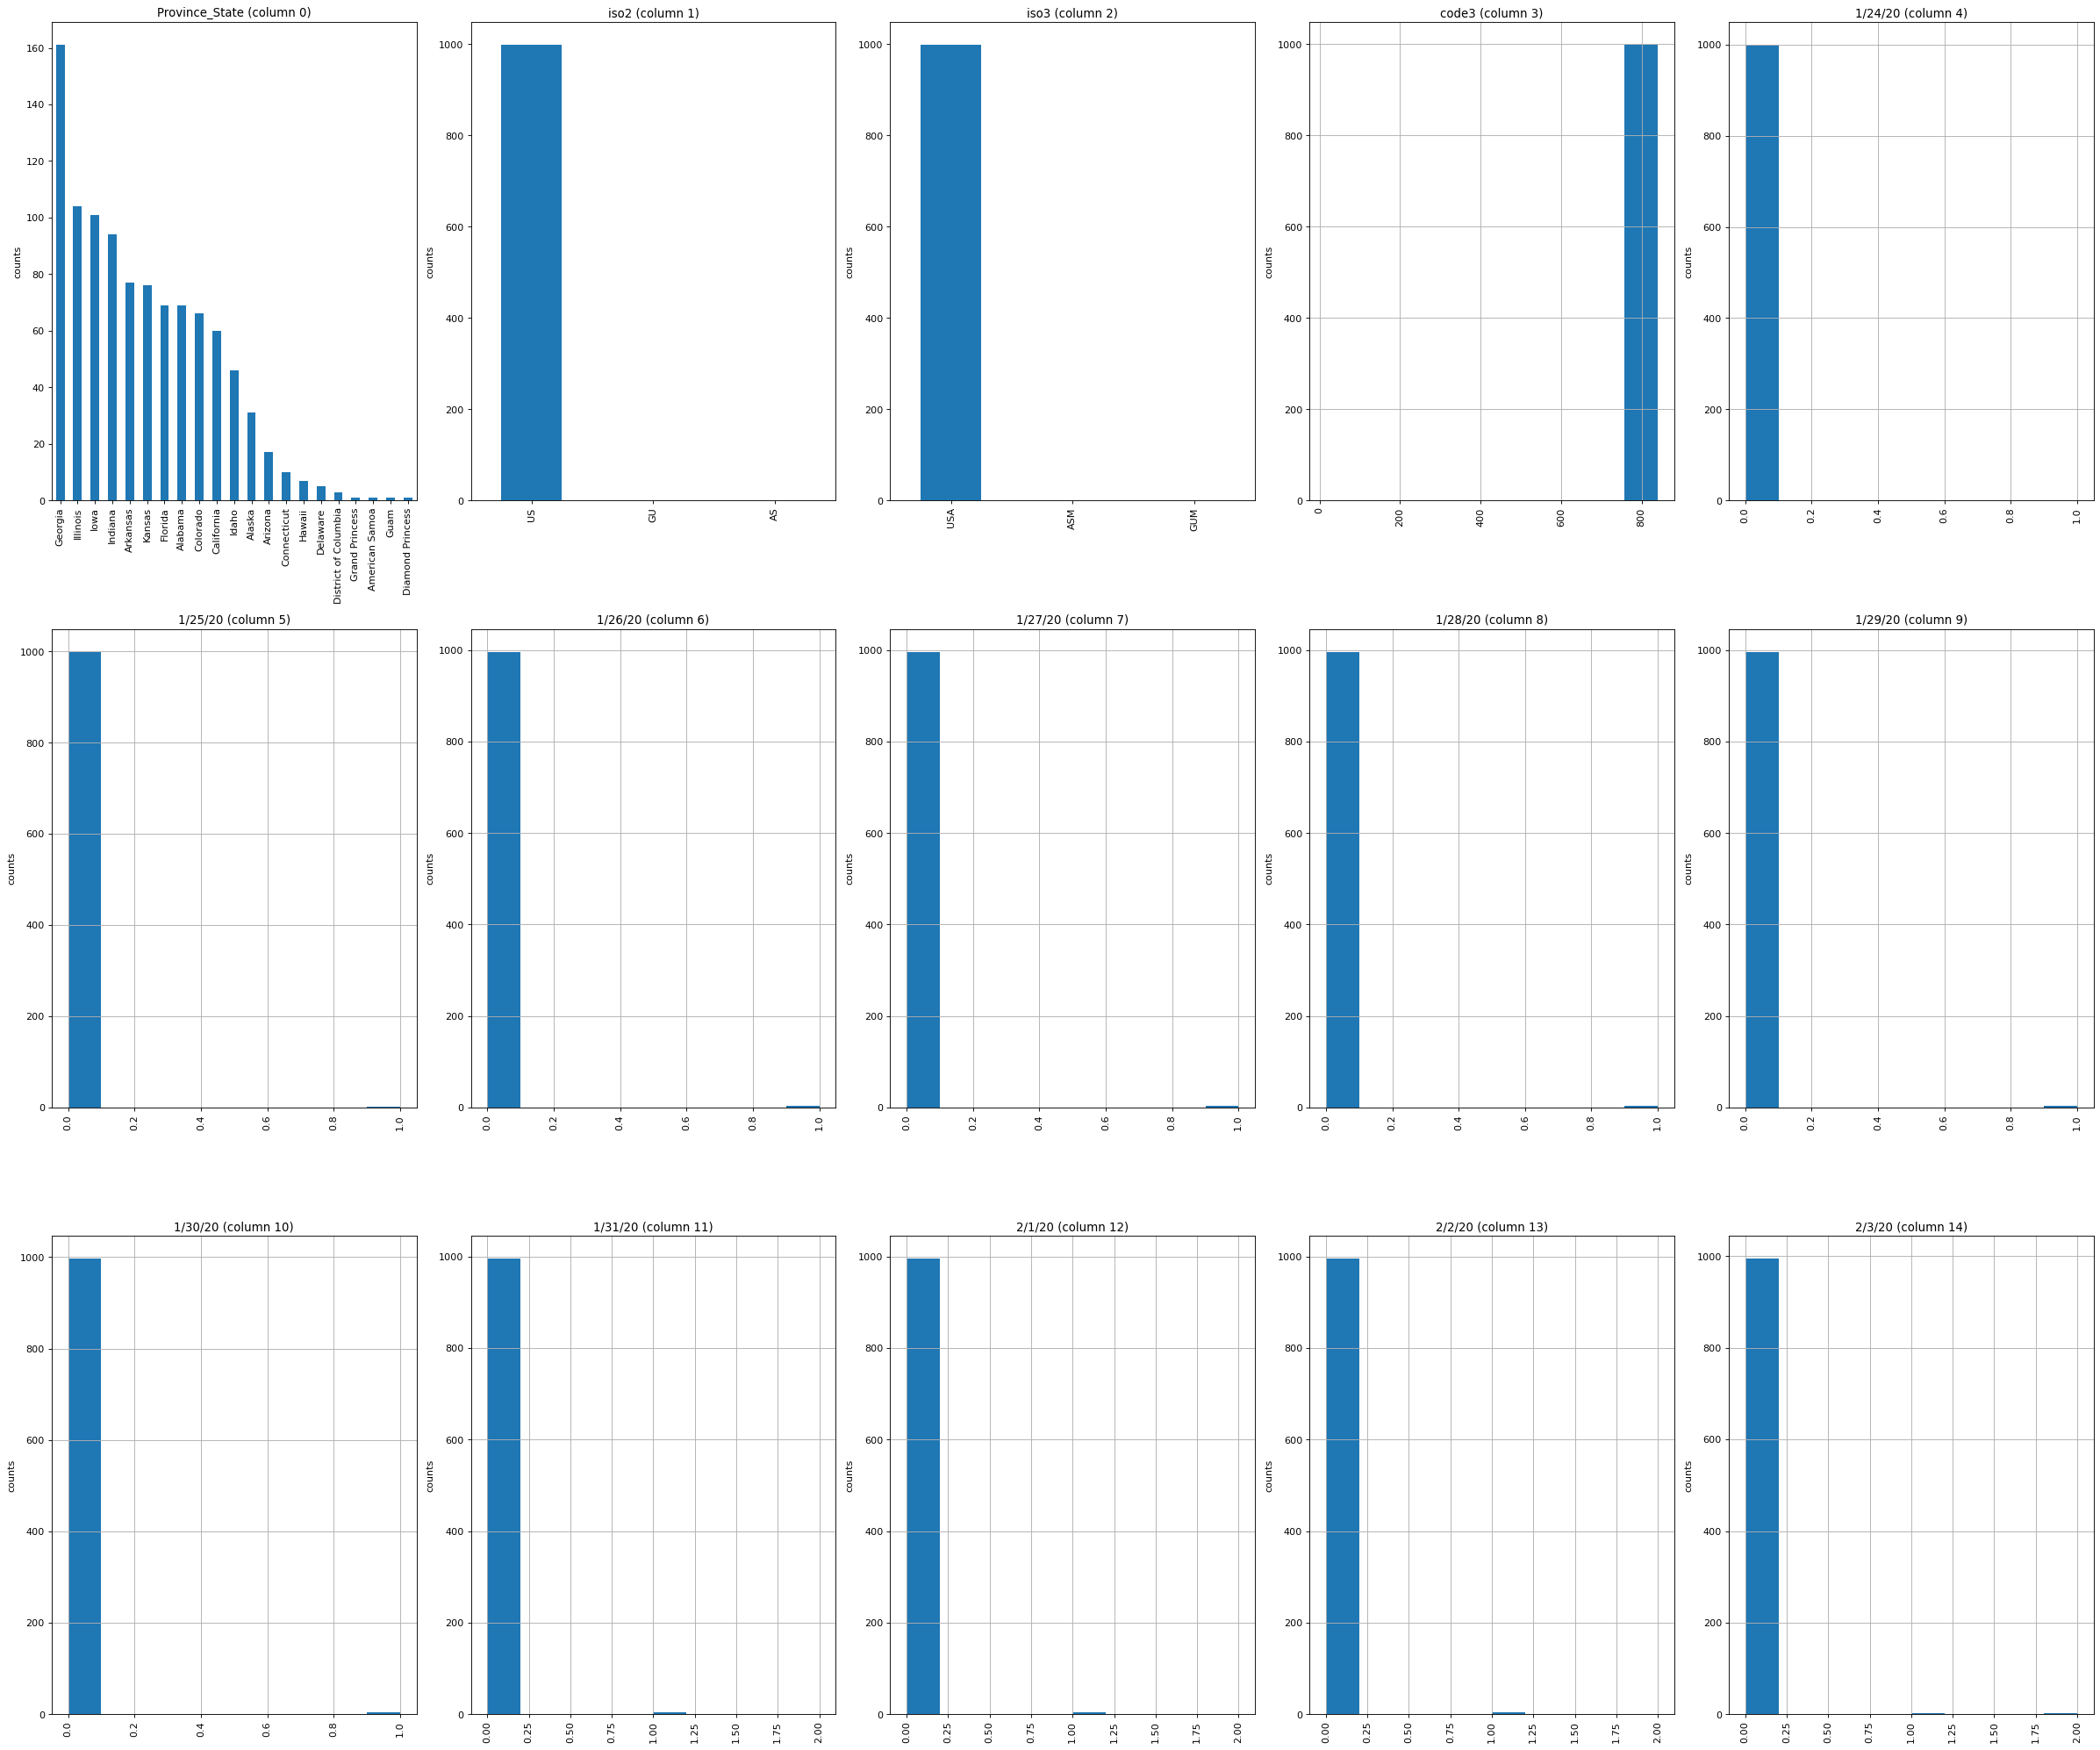

In [37]:
plotPerColumnDistribution(df1, 15, 5)

KeyboardInterrupt: 

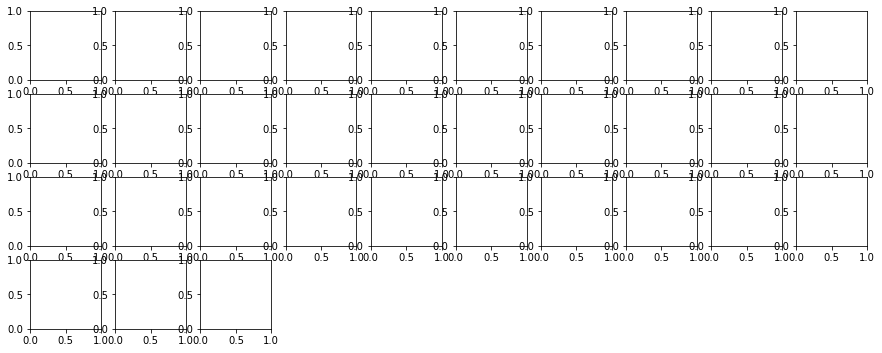

In [50]:
plotScatterMatrix(df1, 20, 10)